# **Understanding Causality for Charles River Water Quality Analysis**

Name: Apoorv Dhaygude   
NUID: 002207325

# **Abstract**

This notebook introduces a practical, hands-on exploration of causal inference using real-world water quality data from the Lower Charles River. Beginning with essential data preparation steps—such as loading, cleaning, and examining the dataset—it walks readers through the process of identifying key variables that may influence dissolved oxygen levels, a critical indicator of water health. It explains the limitations of simple correlation analysis and transitions into causal reasoning using tools like Pearson's correlation, linear regression, random forest modeling, and finally, causal graphs (via causalnex or other visual tools). The notebook demonstrates how to visualize and interpret a causal structure, highlighting the potential influences of features like pH, turbidity, and conductivity. Readers will gain an understanding of how causal models differ from predictive models, why data preparation is crucial for causal discovery, and how to use machine learning and graph-based methods to uncover actionable insights for environmental monitoring and decision-making.

# **What is Causal Inference?**

Causal inference is the science of determining **what causes what**. It goes beyond identifying patterns or associations in data to uncover the actual mechanisms that lead to specific outcomes. In other words, it seeks to answer questions not just about *what* is happening, but *why* it is happening—and what would happen if we intervened.

Think of it as detective work for data: instead of simply observing that two events occur together, causal inference helps us understand whether one event is **causing** the other. This distinction is critical for making sound decisions in areas such as medicine, economics, public policy, and technology.




## **Why Not Just Use Correlation?**

Traditional statistical methods often focus on **correlation**—finding variables that move together. However, correlation alone can be misleading. For example, ice cream sales and drowning incidents may both increase during the summer, but one does not cause the other. Without a formal understanding of causality, we risk drawing incorrect conclusions and making poor decisions.

## **What Makes Causal Inference Different?**

Causal inference provides a structured framework for answering questions like:
- "What would happen if we implemented a new policy?"
- "Would a patient's outcome improve if they received a different treatment?"
- "What is the effect of this intervention on the target outcome?"

To answer these, causal inference often incorporates:
- **Assumptions** about how variables relate to each other
- **Counterfactual reasoning** (what would have happened under different circumstances)
- **Tools** like randomized controlled trials (RCTs), instrumental variables (IV), and graphical models such as **Directed Acyclic Graphs (DAGs)**

## **An Illustrative Example**

Consider this scenario:

- **Have you ever woken up with a headache after wearing shoes to bed?**  
At first glance, it might seem like the shoes caused the headache.  

![Causal Inference](https://cdn.plainconcepts.com/wp-content/uploads/2023/03/causal-ml-explanation.png)

But in reality, there could be a **third factor**—such as alcohol consumption the night before—that caused both.

![Causal Inference](https://cdn.plainconcepts.com/wp-content/uploads/2023/03/causal-ml-explanation-end.png)

This reason is called a **confounding variable**. A confounding variable disrupts the apparent relationship between an input (independent) variable and an output (dependent) variable. It is associated with both the cause and the effect, and can create the illusion of a causal relationship where none actually exists.

In our earlier example, alcohol consumption is a confounder—it is related to both wearing shoes to bed and waking up with a headache. If we fail to account for it, we might mistakenly infer that the shoes caused the headache.

The overall (spurious) connection looks like this:

![Causal Inference](https://cdn.plainconcepts.com/wp-content/uploads/2023/03/causal-ml-total-association.png)



# **What Does It Mean for One Thing to Cause Another?**

Simply put, **T causes Y** if **changing T leads to a change in Y**, *all else being equal*. This idea is at the heart of causal inference.

In other words, we say that a variable **T** (often called the treatment or intervention) has a **causal effect** on another variable **Y** (the outcome) if, when we change T, the outcome Y changes as a result—assuming everything else in the environment stays constant.

![Causal Inference1](https://cdn.plainconcepts.com/wp-content/uploads/2023/03/causal-ml-equation.jpg)

**Causal inference** refers to the process of drawing conclusions about **cause-and-effect relationships** based on observed data. In other words, it's about determining whether one event or factor **directly causes** another event or outcome.

Unlike traditional statistical analysis, which often focuses on finding associations or correlations, causal inference aims to answer deeper questions such as:
- *Does X actually cause Y?*
- *What would happen to Y if we intervened and changed X?*

This process involves a combination of assumptions, theoretical frameworks, and often sophisticated techniques to separate true causal relationships from mere correlations.

Causal inference is fundamental in areas like:
- **Healthcare** (e.g., Does a new drug reduce symptoms?)
- **Economics** (e.g., Do tax cuts stimulate economic growth?)
- **Public policy** (e.g., Does increasing the minimum wage affect employment?)
- **Technology and AI** (e.g., What features lead to better user engagement?)

Ultimately, causal inference allows us to **move beyond describing the world to understanding and influencing it.**


# **Correlation vs. Causation**

A common pitfall in data analysis is **confusing correlation with causation**. While these two concepts are related, they are fundamentally different.




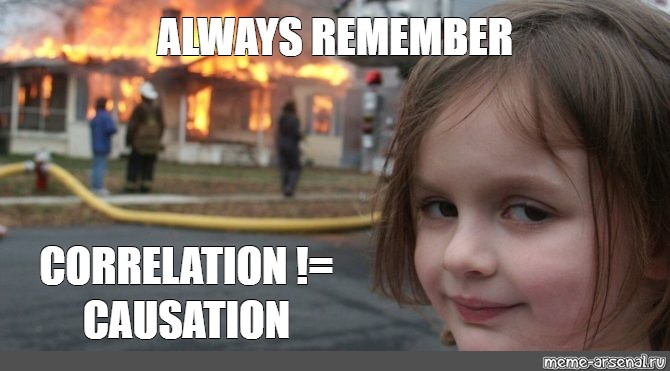

## **Correlation**  
Correlation means that two variables move together in some way. When one changes, the other tends to change as well. However, this relationship does **not** imply that one variable is causing the other to change.

For example:
- Ice cream sales and drowning incidents both increase in summer.
- These two variables are **correlated**, but one does **not cause** the other.
- A **third factor** (temperature) is influencing both.

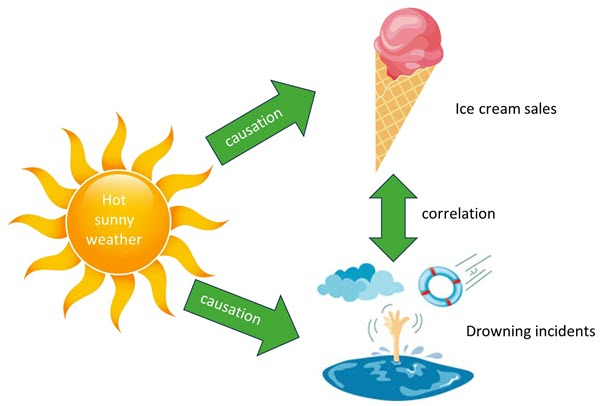


## **Causation**  
Causation implies that one variable **directly influences** the other. If variable T causes variable Y, then changing T will result in a change in Y, *assuming all else is equal*.

#### Key Differences

| Concept       | Description                                                                 | Example                                                 |
|---------------|-----------------------------------------------------------------------------|---------------------------------------------------------|
| Correlation   | Statistical association between two variables                               | People who carry lighters are more likely to get lung cancer (due to smoking) |
| Causation     | A change in one variable **directly** causes a change in another variable   | Smoking causes lung cancer                              |

#### Why This Matters

Failing to distinguish between correlation and causation can lead to:
- Faulty conclusions
- Ineffective or harmful policies
- Misleading predictions in machine learning

Understanding the difference is a **core goal of causal inference**—to move beyond observed relationships and uncover **true causal mechanisms**.


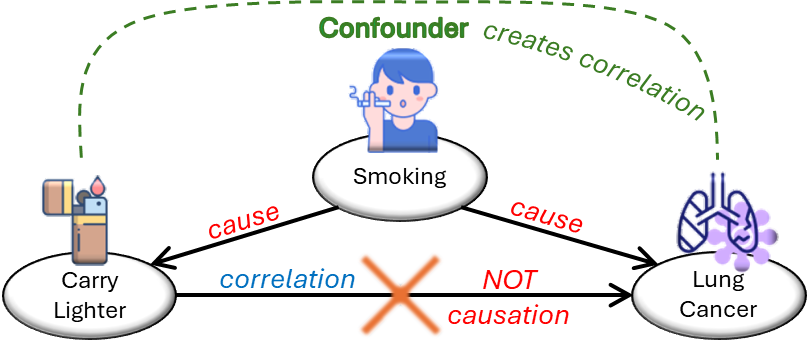

# **Causal Inference Methodologies**

Causal inference methods are used to uncover cause-and-effect relationships from data. These methods may rely on **experimental designs** or **observational data**, depending on feasibility and context. The goal is to estimate the effect of interventions while accounting for potential confounding factors.


## **Randomized Controlled Trials (RCTs)**

**Randomized Controlled Trials (RCTs)** are experimental studies where participants are **randomly assigned** to different groups—typically a **treatment group** and a **control group**.

This randomization ensures that any differences between the groups are due to chance, helping to **eliminate confounding variables**. As a result, RCTs are considered the **gold standard** for establishing causal relationships.

### **Key Characteristics:**
- **Random Assignment:** Ensures groups are statistically equivalent at baseline.
- **Control Group:** Serves as a benchmark to measure the effect of the treatment.
- **Blinding (optional):** Prevents bias if participants or researchers don't know which group they're in.

### **Example:**
To test the effectiveness of a new drug:
- Group A receives the drug (treatment group).
- Group B receives a placebo (control group).
- After a period of observation, outcomes are compared to determine the causal effect of the drug.

### **Strengths:**
- High internal validity
- Clear attribution of effects to the treatment

### **Limitations:**
- Can be expensive or time-consuming
- May not be ethical or feasible for certain interventions
- Results may not generalize well to real-world settings (external validity)

RCTs are foundational in medicine, psychology, and social sciences where direct manipulation and control are possible.


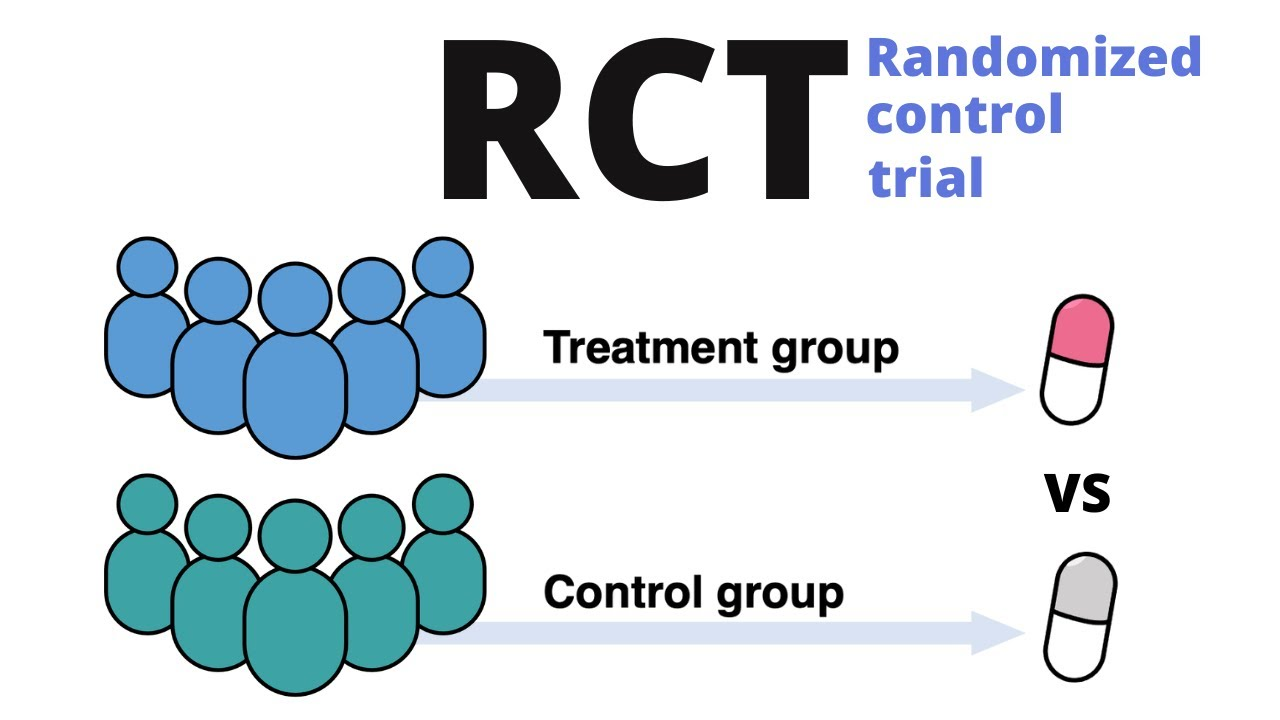

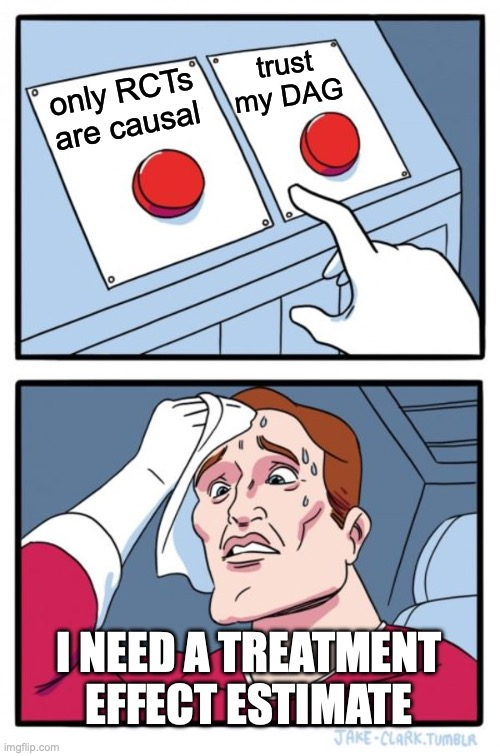

## **Natural Experiments**

**Natural experiments** occur when the assignment of treatment or exposure is determined by **external factors beyond the researcher’s control**, but in a way that mimics randomization.

These situations often arise from:
- Policy changes
- Institutional or geographic boundaries
- Sudden historical events
- Administrative decisions

Because the assignment is plausibly exogenous (i.e., unrelated to the outcome except through the treatment), natural experiments can provide credible estimates of **causal effects**, especially when randomized controlled trials (RCTs) are **infeasible, unethical, or too costly**.

### **Example:**
Suppose a government introduces a new education policy only in certain districts due to political constraints. Researchers can compare outcomes (e.g., student performance) in affected vs. unaffected districts to estimate the **causal impact of the policy**—assuming the districts are otherwise similar.

### **Strengths:**
- Can leverage real-world events for causal analysis
- More ethical and feasible than RCTs in many cases

**Limitations:**
- Requires strong assumptions (e.g., no unmeasured confounders)
- May lack true randomness
- Identification of the “as-if random” variation can be complex

Natural experiments are widely used in economics, public policy, education, and epidemiology to uncover causal relationships in observational data.


## **Causal Modeling from Observational Data**

When randomized experiments are not feasible, researchers use **causal modeling techniques** to estimate causal effects from **observational data**. These methods aim to adjust for **confounding variables** and approximate the conditions of a randomized experiment.

Below are some widely used techniques:


- **Instrumental Variables (IV):**  
  Uses a third variable (instrument) that influences the treatment but does **not directly affect the outcome**, except through the treatment.  
  Useful when treatment is endogenous (i.e., correlated with unobserved confounders).

- **Propensity Score Matching (PSM):**  
  Matches treated and untreated units with similar observed covariates (based on their propensity to receive the treatment) to balance the groups and reduce bias.

- **Structural Equation Modeling (SEM):**  
  A comprehensive statistical framework for modeling complex relationships between observed and latent variables, often used for simultaneous equations and causal paths.

- **Causal Mediation Analysis:**  
  Decomposes the total effect of a treatment into:
  - **Direct effects:** The portion of the treatment effect not mediated by other variables
  - **Indirect (mediated) effects:** The portion that operates through intermediate variables (mediators)


These methods **require assumptions** about the data-generating process and often rely on domain knowledge, graphical models (e.g., DAGs), or sensitivity analysis to ensure valid causal interpretations.

### **Strengths:**
- Enables causal reasoning with real-world data
- Flexible and broadly applicable

### **Limitations:**
- Results depend on model assumptions and covariate selection
- Cannot fully eliminate bias from unobserved confounding


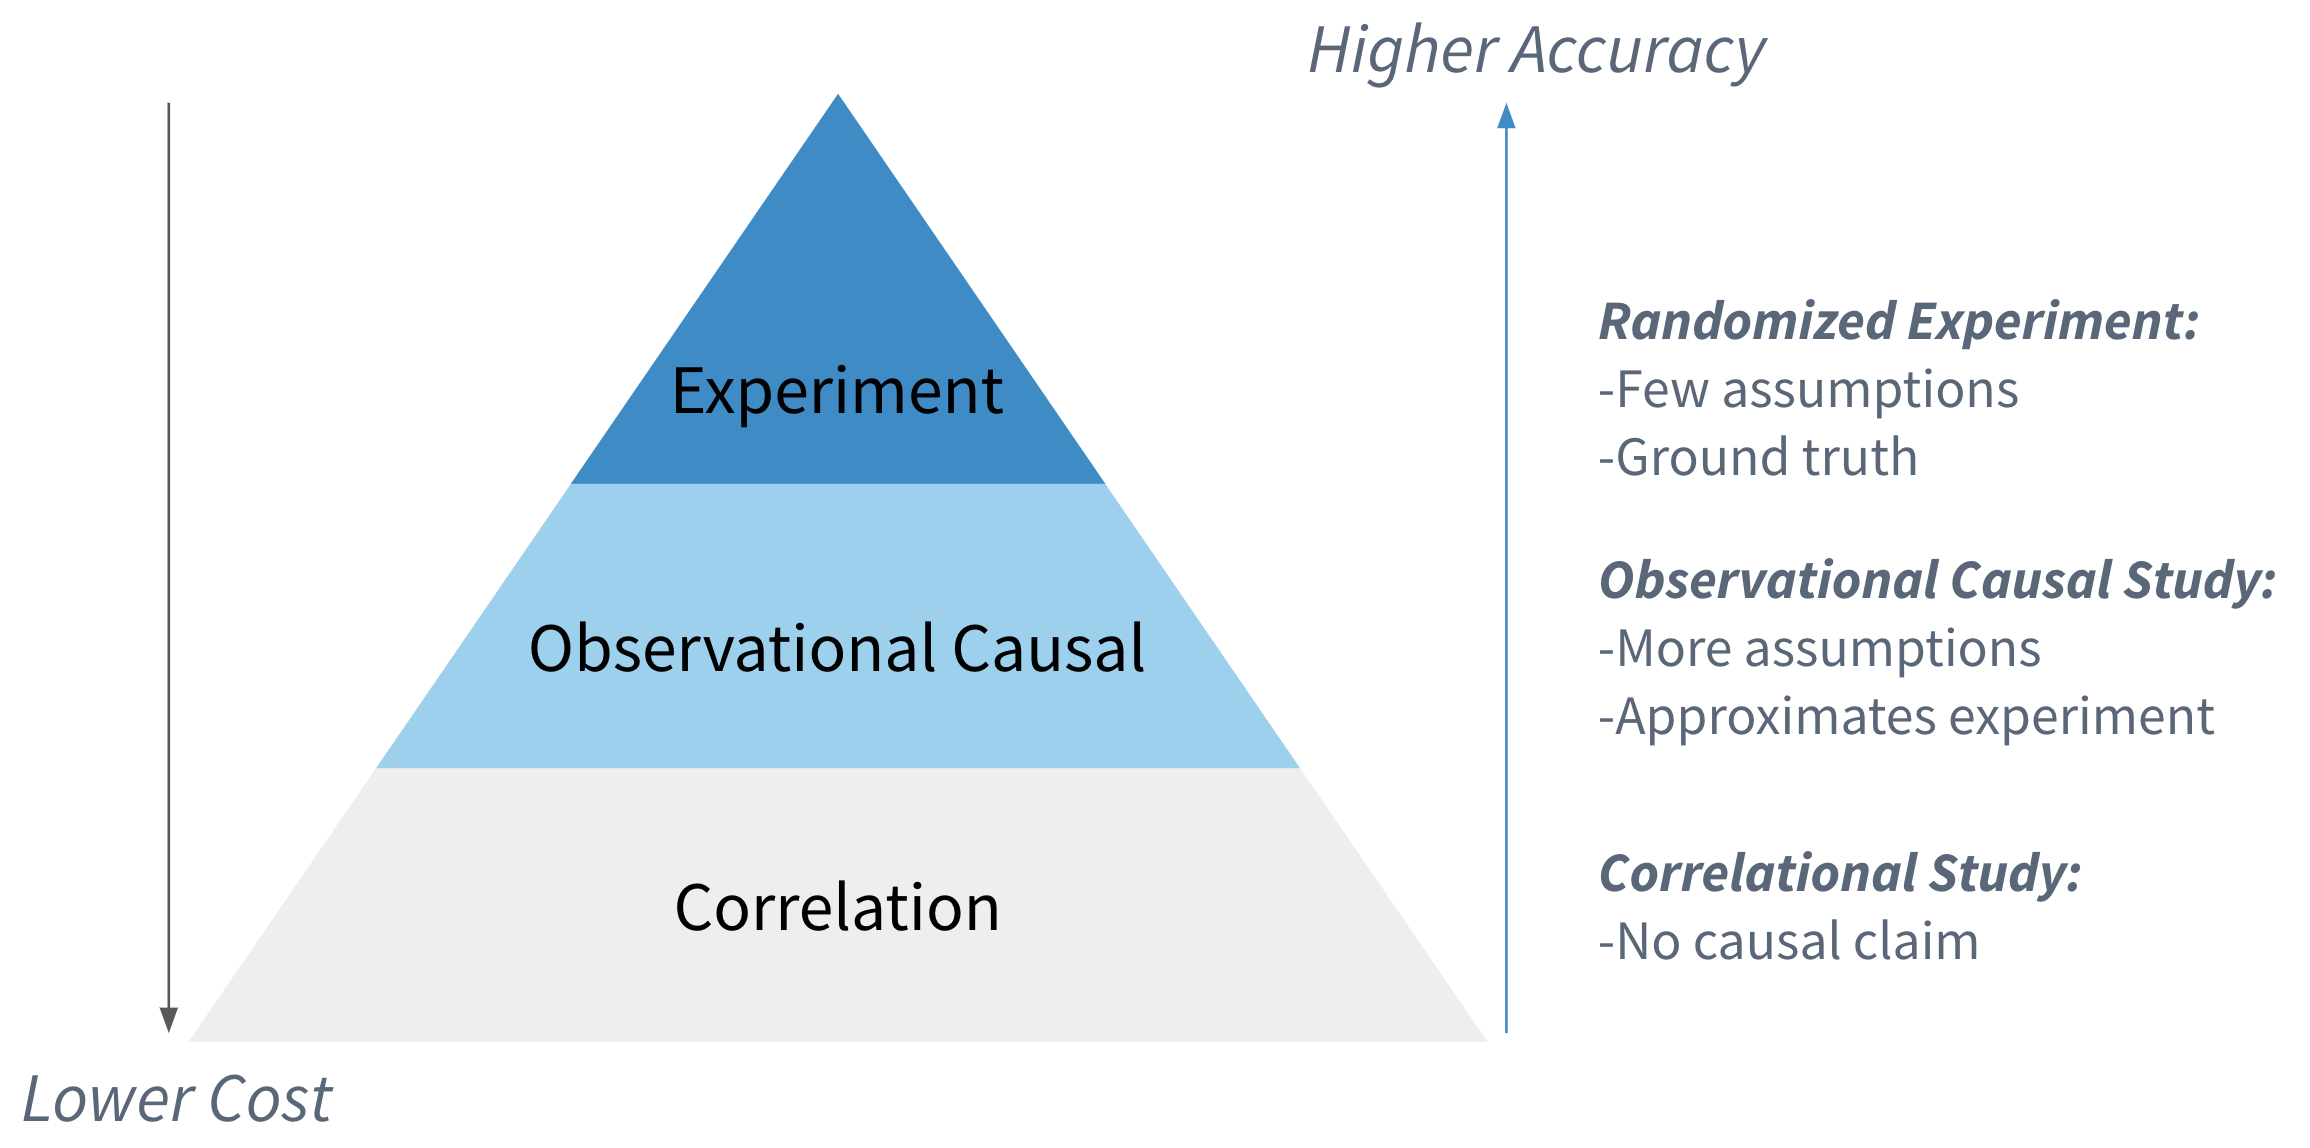

## **Counterfactual Analysis**

**Counterfactual analysis** is a foundational concept in causal inference. It involves reasoning about what would have happened to the **same unit** (e.g., person, region, organization) under a **different treatment condition**.

The idea is central to frameworks such as the **Rubin Causal Model** (also known as the Potential Outcomes Framework), which defines the causal effect as:

> **Causal Effect = Outcome with Treatment − Outcome without Treatment**

### **Example:**
If a patient takes a medication and recovers, we ask: *Would the patient have recovered without the medication?*  
We can only observe **one** of these outcomes, not both.

This leads to the **Fundamental Problem of Causal Inference**:
> We can never observe both potential outcomes for the same individual at the same time.

### **Solution:**
To estimate counterfactuals, we rely on:
- **Randomization** (in experiments)
- **Matching or weighting techniques** (in observational studies)
- **Statistical modeling and assumptions** to infer unobserved potential outcomes

### **Key Applications:**
- Estimating treatment effects in medicine and public health
- Policy evaluation (e.g., “What if a policy had not been implemented?”)
- Personalized decision-making (e.g., recommending treatments based on predicted counterfactual outcomes)

### **Strengths:**
- Intuitive framework for defining and understanding causality
- Compatible with many causal inference methods

### **Limitations:**
- Counterfactuals are **not directly observable**
- Requires strong assumptions or design choices to estimate reliably


# **Graphical Models: Directed Acyclic Graphs (DAGs)**

**Directed Acyclic Graphs (DAGs)** are a foundational tool in modern causal inference. They provide a precise, visual representation of assumptions about **causal structure** among a set of variables and serve as a bridge between theory, data, and statistical modeling.

DAGs are widely used in statistics, epidemiology, economics, computer science, and the social sciences to:
- Identify potential sources of bias,
- Inform data collection strategies,
- Select appropriate control variables, and
- Derive testable implications of causal hypotheses.

## **What Are DAGs?**

A **Directed Acyclic Graph (DAG)** is a type of graphical model used to represent assumptions about **causal relationships** between variables. DAGs are central to modern causal inference because they provide a clear, visual structure for understanding how variables influence one another and how causal effects can be identified from data.


- **Directed:**  
  The edges (arrows) in a DAG are **directional**, meaning they point from cause to effect.  
  - An arrow from variable **A** to variable **B** (A → B) indicates that **A is a direct cause of B**.
  - This directionality encodes **causal mechanisms** rather than mere associations.

- **Acyclic:**  
  DAGs are **acyclic**, meaning they do **not contain any feedback loops or cycles**.  
  - You cannot start at one node and follow a path of arrows that leads back to that same node.
  - This ensures a consistent **temporal or logical order** among variables, which is essential for causal interpretation.

- **Graphical Representation:**  
  - **Nodes** (or vertices) represent **variables** in the system.
  - **Edges** (directed arrows) represent **direct causal influences**.
  - The **absence of an edge** is also meaningful—it implies the assumption of **no direct causal effect** between the two variables.
  

## **Why Use DAGs?**

**Directed Acyclic Graphs (DAGs)** are more than just diagrams—they are formal, mathematical objects that encode the **assumptions** and **structure** of causal relationships among variables. They serve as a critical foundation for modern causal inference by providing a principled way to reason about which variables to adjust for, what sources of bias might exist, and how to interpret relationships in data.

DAGs are particularly valuable for the following reasons:


- **Making Assumptions Explicit:**  
  In causal analysis, assumptions are unavoidable—but they are often hidden or implicit. DAGs make these assumptions transparent:
  - Each **edge** represents a **direct causal effect**.
  - The **absence** of an edge implies an assumption of **no direct causal link**.
  This allows others to scrutinize and debate the plausibility of the model.


- **Identifying Confounding Paths:**  
  DAGs distinguish between:
  - **Causal paths** (from treatment to outcome)
  - **Backdoor paths** (paths that introduce bias due to common causes)
  By visually inspecting the graph, we can identify and block these non-causal (confounding) paths to obtain an unbiased estimate of the causal effect.


- **Determining Adjustment Sets:**  
  Using criteria such as the **backdoor criterion** and **d-separation**, DAGs guide us in selecting the minimal set of variables to condition on in order to control for confounding—without overadjusting or conditioning on colliders.


- **Simulating Interventions (Do-Calculus):**  
  DAGs support reasoning about **interventions** using the `do(X = x)` operator.  
  - Developed by Judea Pearl, **do-calculus** provides algebraic rules for modifying DAGs to reflect hypothetical interventions.
  - This enables researchers to predict the outcome of a treatment, policy, or manipulation—even in observational settings.


- **Testing and Validating Models:**  
  DAGs impose **testable implications** on observed data. For example:
  - If two variables are d-separated given a set Z, they should be **conditionally independent** in the data.
  - Violations of these implications can point to **misspecified assumptions** or **measurement issues**.



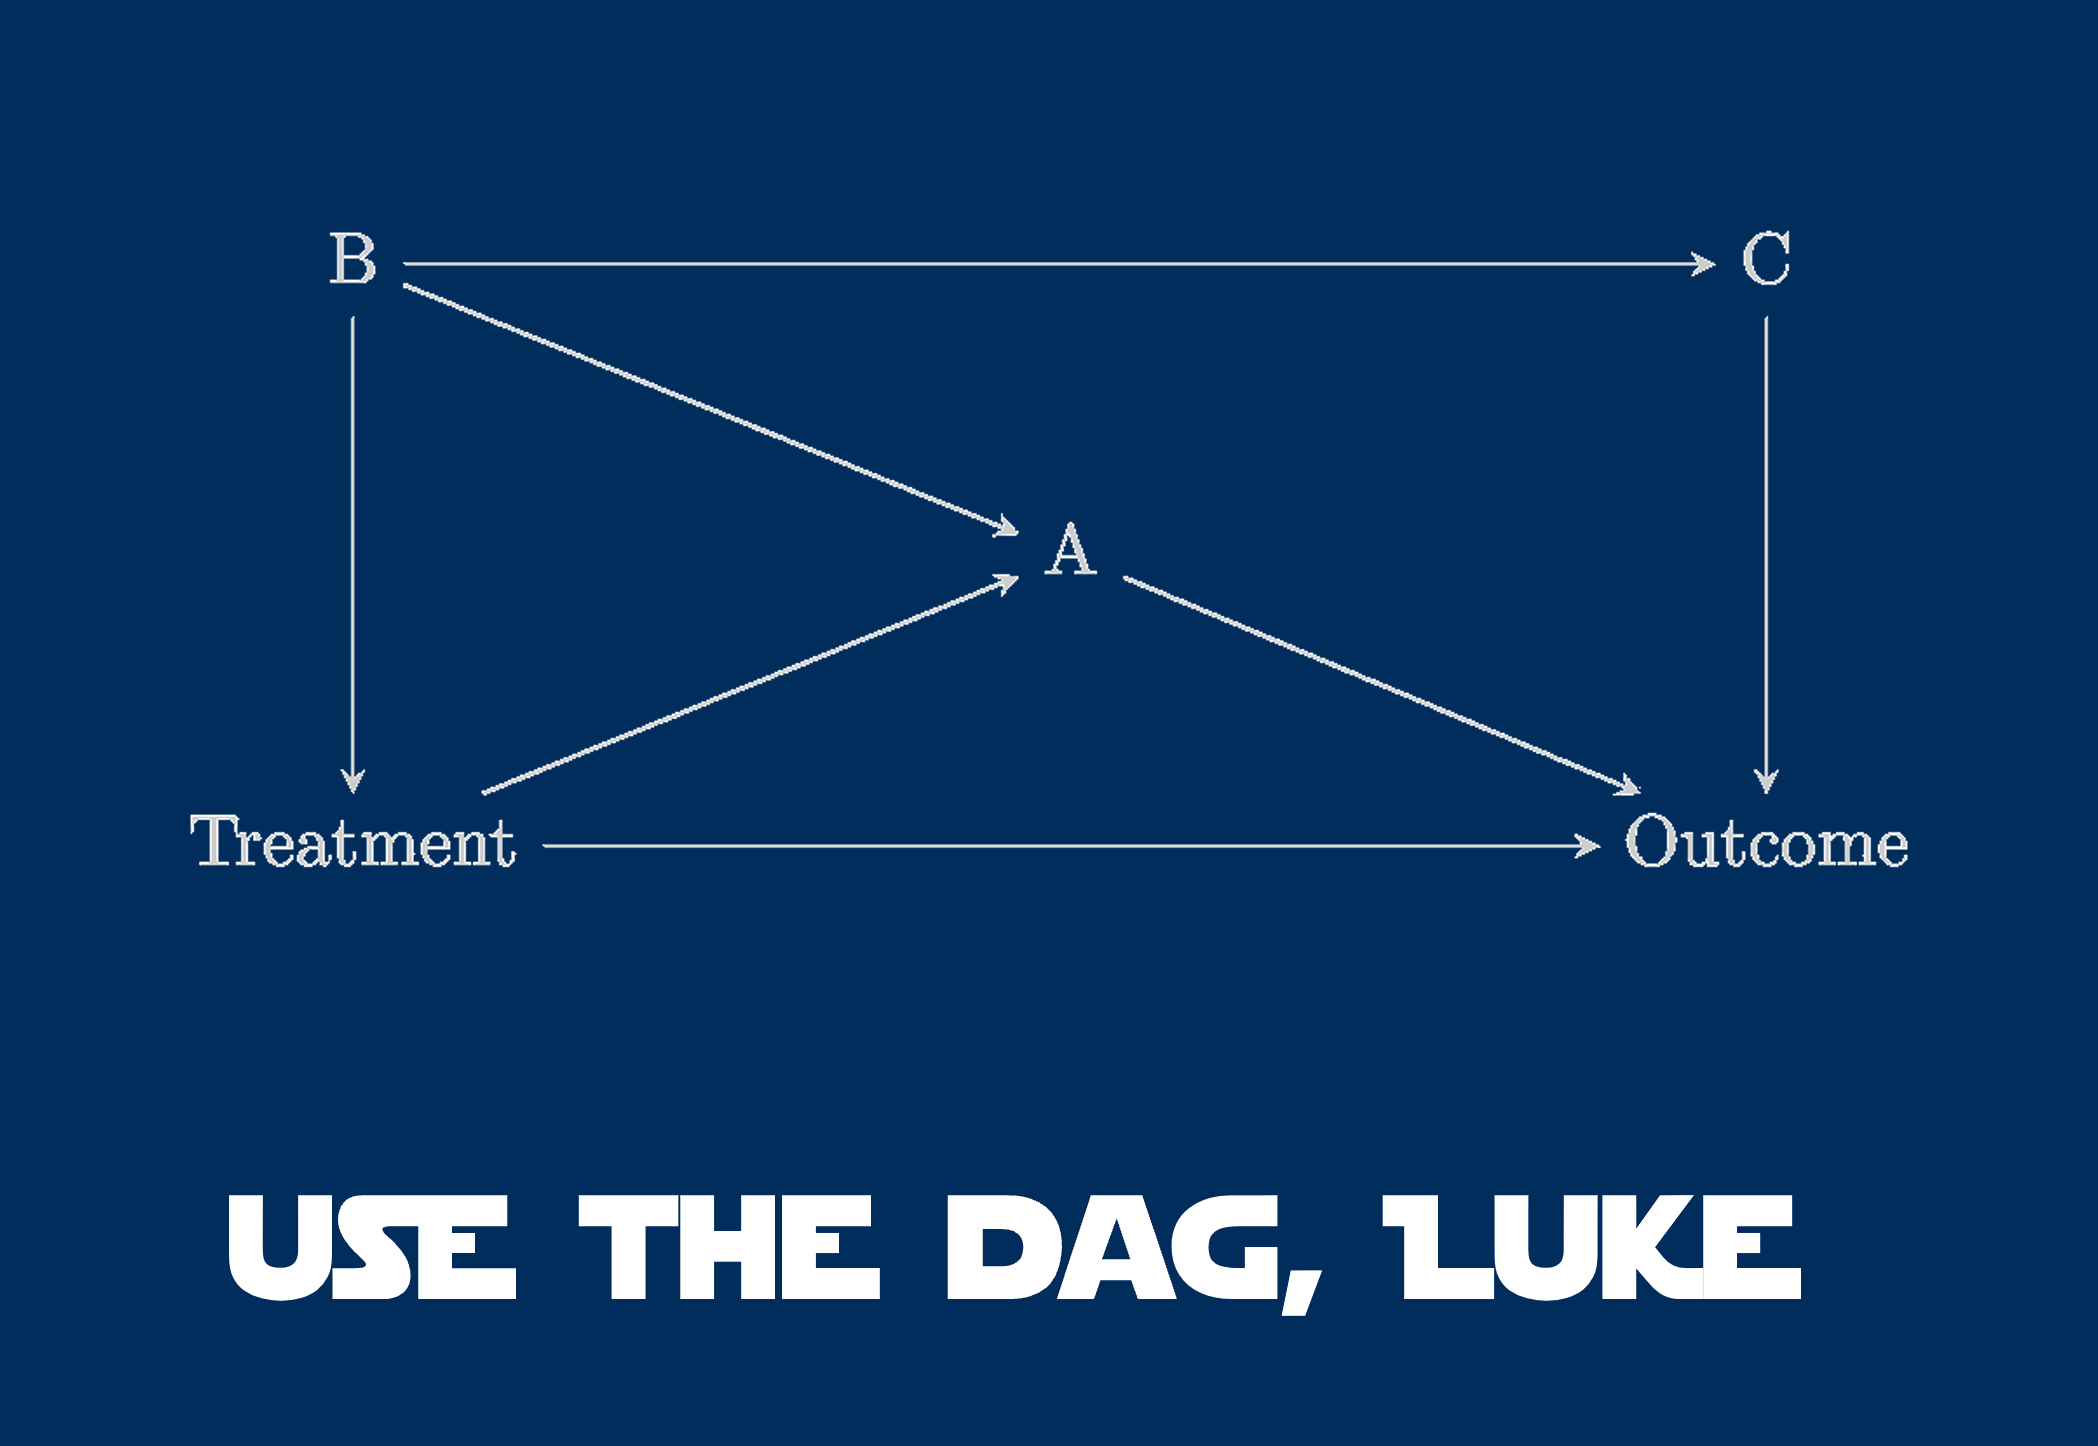

## **Key Concepts in DAG-Based Causal Inference**

Understanding how to interpret and manipulate DAGs requires familiarity with several foundational concepts. These concepts help identify when and how causal effects can be estimated from observational data.



- **Backdoor Paths:**  
  A backdoor path is any non-causal path between a treatment variable (X) and an outcome (Y) that **"sneaks around"** the main causal path and can introduce bias into the estimation of causal effects.  
  - These paths often involve common causes (confounders) of both X and Y.
  - To estimate the causal effect of X on Y accurately, we must **block all backdoor paths**, typically by adjusting for (conditioning on) certain variables.

  **Example:**  
  If smoking (X) causes lung cancer (Y), but genetic predisposition affects both smoking and cancer risk, genetic predisposition opens a backdoor path and must be controlled for.



- **Collider Variables:**  
  A **collider** is a variable that is caused by two (or more) variables.  
  - **Crucially**, conditioning on a collider **opens a path** that would otherwise be closed, introducing **collider bias**.
  - This can create a spurious association between the variables that cause the collider, even if they are otherwise unrelated.

  **Example:**  
  Suppose education level and athletic ability both influence admission to a university. Conditioning on "admission" (the collider) can induce a false association between education and athleticism.



- **d-Separation:**  
  **d-Separation** (directional separation) is a graphical criterion used to determine whether a set of variables blocks all paths between two nodes in a DAG.
  - If all paths from X to Y are **blocked** by a set of variables Z (according to d-separation), then X and Y are **conditionally independent given Z**.
  - This concept helps identify **valid adjustment sets** that eliminate confounding.

  **Application:**  
  Use d-separation to check whether adjusting for a proposed set of variables (Z) is sufficient to identify the causal effect of X on Y.



- **Instrumental Variables (IVs) in DAGs:**  
  An **instrumental variable** (Z) is used to estimate the causal effect of a treatment (X) on an outcome (Y) when there is unmeasured confounding.
  
  Z must satisfy three conditions:
  1. Z has a causal effect on X (relevance).
  2. Z has **no direct effect on Y** (exclusion restriction).
  3. Z is **not associated with any confounder** of X and Y (independence).

  **Example:**  
  In economics, distance to college might be used as an instrument to estimate the effect of education on earnings—assuming distance affects education but not earnings directly, and is uncorrelated with socioeconomic status.


# **Average Treatment Effects: ATE, ATT, and ATC**

When evaluating the impact of a treatment or intervention, we often want to know not just whether it works, but **for whom** it works and **how much** it changes outcomes on average. To answer these questions, we use three key concepts in causal inference:


## **Average Treatment Effect (ATE)**

The **Average Treatment Effect (ATE)** represents the **average impact** of a treatment or intervention **across the entire population**, regardless of whether individuals actually received the treatment.

It answers the question:
> *“What would be the average difference in outcomes if **everyone** in the population received the treatment compared to if **no one** did?”*



### **Key Characteristics:**
- **Population-Level Estimate:** ATE provides a broad, overall measure of the treatment’s effect on the population as a whole.
- **Objective Assessment:** It’s useful for evaluating the **general effectiveness** of a policy, program, or medical treatment.
- **Often Used in Policy Analysis:** Especially relevant in scenarios where a treatment could be made universally available.



### **Why ATE Matters:**
- It helps decision-makers **quantify the expected benefit** (or harm) of rolling out an intervention to everyone.
- It can guide large-scale planning, resource allocation, and policy recommendations.
- ATE is commonly used in randomized controlled trials, observational studies, and simulations to evaluate the overall value of a treatment.



**Use Case Example:**  
A government agency evaluating a new job training program might use ATE to estimate how the program would affect employment rates if it were offered to the entire eligible population.



While ATE provides a useful high-level perspective, it may **mask individual differences** in treatment response, which is why ATT and ATC are also important to consider in certain contexts.


## **Average Treatment Effect on the Treated (ATT)**

The **Average Treatment Effect on the Treated (ATT)** focuses specifically on individuals who **actually received the treatment**. It estimates the **average effect** of the treatment **on those who were exposed to it**.

It answers the question:
> *“What was the effect of the treatment on the people who actually received it?”*



### **Key Characteristics:**
- **Conditional Estimate:** ATT is concerned only with the **treated subgroup**, not the entire population.
- **Real-World Effectiveness:** It reflects the **observed impact** on participants, making it particularly useful for program evaluation.
- **Does Not Assume Population-Wide Applicability:** ATT does not tell us what would happen if everyone were treated—only what happened to those who were.



### **Why ATT Matters:**
- It helps assess whether the **treatment worked as intended** for those who received it.
- Especially relevant in **observational studies** where treatment assignment was not random.
- Provides insight into **implementation success** and **targeted effectiveness**.



**Use Case Example:**  
A hospital tests a new therapy for patients with chronic pain. The ATT tells clinicians whether the therapy had a meaningful impact on the patients who actually received it, helping guide future treatment decisions.



ATT is often contrasted with ATE when:
- There's **treatment effect heterogeneity** (i.e., treatment effects vary across individuals), or
- There's **non-random selection** into treatment (e.g., people choose whether or not to participate).

In such cases, ATT provides a more realistic picture of **observed benefit** for the treated population.



## **Average Treatment Effect on the Controls (ATC)**

The **Average Treatment Effect on the Controls (ATC)** estimates the **average effect** the treatment **would have had** on individuals who **did not receive the treatment**, if they had been treated.

It answers the question:
> *“What would the outcome have been for the untreated group if they had received the treatment?”*



### **Key Characteristics:**
- **Counterfactual Perspective:** ATC considers a hypothetical scenario for the control group, imagining how they would have responded to the treatment.
- **Forward-Looking:** Useful for predicting **potential gains** if an intervention were extended to previously untreated individuals.
- **Targeted for Expansion Decisions:** Helps assess whether scaling up a program to new populations is likely to produce similar or different outcomes.



### **Why ATC Matters:**
- It supports **policy planning and resource allocation** by identifying the potential benefits of expanding access.
- Especially relevant in **public health**, **education**, and **social policy**, where reaching the untreated can have significant societal benefits.
- Useful when there's **heterogeneity in treatment effects**, as the untreated population might respond differently than the treated.



**Use Case Example:**  
A government is considering expanding a free tutoring program to additional schools that didn’t previously participate. ATC helps estimate the expected improvement in student performance if those new schools had access to the program.



While ATC is less commonly reported than ATE or ATT, it plays a crucial role in decisions about **scaling interventions**, **targeting outreach**, and understanding the **unrealized impact** of treatment among those who were left out.


----

# **Causal Question: Influence of Water Parameters on Water Quality**

Understanding the complex relationship between environmental variables and water quality is essential for informed water resource management, pollution control, and ecosystem conservation. Water quality is not determined by a single factor but by a **multidimensional interaction** of physical, chemical, and biological parameters that collectively influence the health and functionality of aquatic ecosystems.


## **Why It Matters**

Changes in water quality can significantly affect:
- **Aquatic biodiversity**
- **Human health**
- **Recreational and economic uses of water bodies**
- **The overall resilience and sustainability of freshwater ecosystems**

A causal understanding of how specific water parameters influence water quality can guide **effective interventions**, support **regulatory decisions**, and enable **early warning systems** for environmental risks such as harmful algal blooms or oxygen depletion.



## **Key Water Parameters and Their Influence**

- **Temperature**  
  Influences the solubility of gases (e.g., oxygen) and governs biological activity. Elevated temperatures can accelerate metabolic processes and decrease dissolved oxygen availability, stressing aquatic life.

- **Conductivity**  
  Reflects the concentration of dissolved ions in the water and can signal **pollution** (e.g., from agricultural runoff or wastewater discharge). High conductivity may also indicate increased salinity, affecting species composition.

- **pH**  
  Indicates the **acidity or alkalinity** of water. Deviations from neutral pH can disrupt chemical processes, reduce nutrient availability, and impair aquatic organisms’ health and reproduction.

- **Dissolved Oxygen (DO)**  
  A critical factor for aerobic aquatic life. DO levels are affected by temperature, turbulence, photosynthesis, and decomposition. Low DO can lead to **hypoxic conditions**, threatening fish and invertebrates.

- **Turbidity**  
  Measures water **clarity** and is influenced by suspended particles like silt, algae, or organic matter. High turbidity reduces light penetration, affecting photosynthesis and degrading habitat quality.

- **Chlorophyll-a Concentration**  
  Serves as a proxy for **algal biomass** and is used to assess primary productivity. Elevated levels often indicate **nutrient enrichment** (eutrophication) and may signal risk of harmful algal blooms.

- **Phycocyanin Concentration**  
  A pigment specific to **cyanobacteria (blue-green algae)**. High levels are associated with **toxic algal blooms**, which pose health risks to humans and animals.


## **Framing the Causal Question**

A central causal question might be:

> *How do changes in environmental parameters such as temperature, pH, turbidity, and nutrient-related indicators causally affect overall water quality in freshwater ecosystems?*

Answering this requires distinguishing **correlation** from **causation**, understanding **confounding relationships**, and potentially using tools like:
- **Directed Acyclic Graphs (DAGs)**
- **Causal modeling techniques** (e.g., structural equation modeling, propensity score methods)
- **Counterfactual frameworks** to simulate intervention scenarios


## **Implications**

Gaining causal insights into these relationships allows environmental managers and policymakers to:
- Identify **key drivers** of poor water quality
- Design **targeted interventions**
- Monitor **critical thresholds** for ecosystem health
- Implement **evidence-based strategies** for conservation and sustainable water use

Preserving freshwater quality is not only critical for biodiversity and ecological resilience but also for ensuring long-term human access to safe and clean water.


## **Introduction**

This study aims to investigate how variations in environmental water parameters—such as temperature, conductivity, pH, dissolved oxygen levels, turbidity, chlorophyll concentration, and phycocyanin concentration—affect overall water quality. By examining these relationships, we seek to gain insights into the health and functioning of aquatic ecosystems and identify potential implications for human health and well-being.



## **Study Design**

We will conduct an **observational study** focusing on the **Charles River** and other selected water bodies. Sampling will be conducted across multiple locations to capture **spatial variability** in environmental conditions and water quality outcomes.

The study will include a comprehensive analysis of water parameters alongside key water quality indicators to explore **potential causal relationships** and generate actionable insights for water resource management, pollution mitigation, and ecological preservation.


## **Data Collection**

- **Water Quality Indicators**:  
  Data will include metrics such as contamination levels (e.g., heavy metals, nitrates), microbial counts (e.g., E. coli), and regulatory benchmarks. These will be obtained from **municipal water quality records**, **public databases**, or **direct testing reports**.

- **Water Parameters**:  
  Data on environmental parameters—temperature, pH, dissolved oxygen, turbidity, conductivity, chlorophyll-a, and phycocyanin—will be collected through **on-site sampling**, **remote sensing**, or existing **monitoring systems**.


## **Causal Inference Process**

To understand the potential causal influence of water parameters on water quality, we will follow a structured causal inference framework:

1. **Establishing Association**  
   We will begin by conducting exploratory and statistical analyses to determine whether a measurable association exists between water parameters (independent variables) and water quality indicators (dependent variables). Correlation and regression techniques will help quantify the strength and direction of these relationships.

2. **Considering Alternative Explanations**  
   Recognizing that correlation does not imply causation, we will examine other plausible explanations for observed associations. This includes evaluating **external influences**, **measurement errors**, or **unobserved variables** that could impact both the independent and dependent variables.

3. **Addressing Confounding Factors**  
   To reduce bias from confounding variables, we will apply statistical techniques such as:
   - **Multivariable regression analysis**
   - **Matching (e.g., propensity score matching)**
   - **Stratification by relevant subgroups**

   These approaches will allow us to isolate the effect of specific water parameters while controlling for other influencing factors.

4. **Assessing Temporality**  
   To support a causal interpretation, we will examine whether **changes in water parameters precede changes in water quality**. Establishing this temporal order is essential to confirm that potential causes occur before their effects.

5. **Evaluating the Strength and Consistency of Association**  
   We will assess the **magnitude**, **statistical significance**, and **robustness** of the observed associations across different sites and timeframes. A strong, consistent relationship enhances the credibility of a causal claim.

6. **Assessing Biological Plausibility**  
   Finally, we will interpret findings in light of **biological and ecological theory**. For example, reduced dissolved oxygen leading to fish kills, or elevated phycocyanin indicating harmful algal blooms, provides a mechanistic basis for observed patterns. Incorporating biological plausibility strengthens the overall validity of the causal inference.


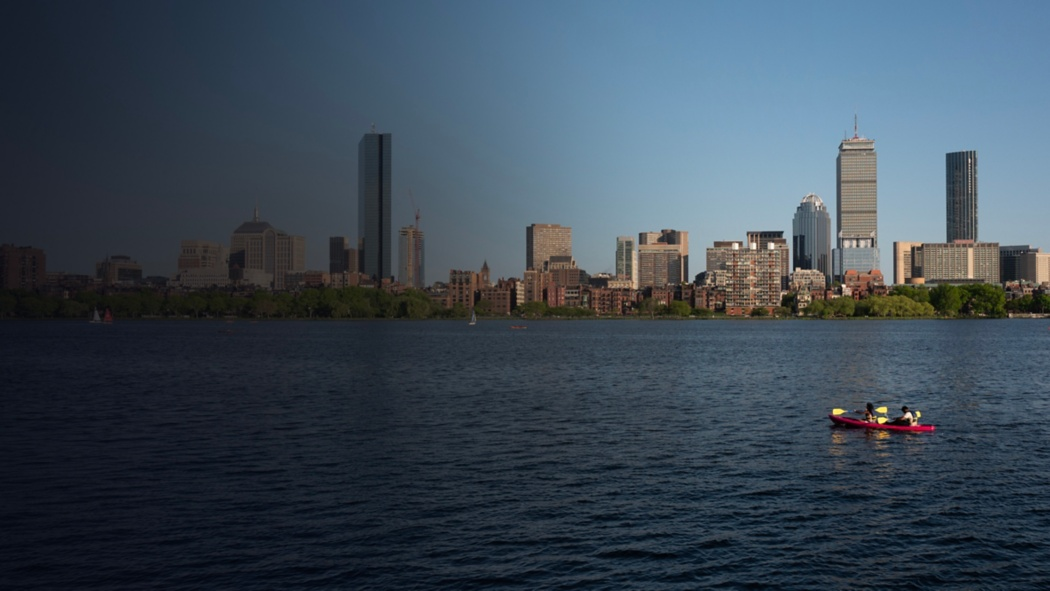

## **Dataset Overview**
**Source**: [EPA - Live Water Quality Data, Lower Charles River](https://www.epa.gov/charlesriver/live-water-quality-data-lower-charles-river)

This dataset contains **high-frequency water quality monitoring data** collected from the Charles River near the Museum of Science in Boston. Data are gathered via a **self-contained, solar-powered buoy** equipped with environmental sensors. Measurements are taken **every 15 minutes**, providing real-time insight into water conditions.


## **Parameters Measured**

The dataset includes the following key water quality indicators:


### 1. Temperature (°C)  
- Measures water temperature, a critical factor for **chemical reactions**, **oxygen solubility**, and **aquatic life activity**.  
- Higher temperatures can decrease dissolved oxygen levels and promote **harmful algal blooms**.  
- The water quality threshold is **28.3°C**; exceeding this can stress or harm aquatic organisms.


### 2. Specific Conductance (mS/cm at 25°C)  
- Indicates water’s ability to conduct electrical current, a proxy for **dissolved solids** (e.g., salts, ions, pollutants).  
- Sensitive to **runoff**, **pollution**, and **saltwater intrusion**, especially in areas influenced by dams or tidal flow.


### 3. pH (Unitless Scale: 0–14)  
- Reflects water's **acidity or alkalinity**.  
- A pH outside the optimal range can disrupt biological processes and affect aquatic species.  
- Regulatory standards ensure pH remains within safe limits for **recreation and habitat quality**.



### 4. Dissolved Oxygen (DO) (mg/L)  
- Represents the amount of oxygen available in the water—**critical for fish and invertebrate survival**.  
- DO below **5 mg/L** is considered insufficient for healthy aquatic ecosystems.  
- Affected by temperature, photosynthesis, organic matter decay, and flow conditions.



### 5. Turbidity (NTU)  
- Measures **water clarity** by quantifying suspended particles (e.g., sediment, algae, organic matter).  
- High turbidity can reduce light penetration, **disrupt photosynthesis**, and **degrade habitat** quality.  
- Sources include **urban runoff**, **erosion**, and **biological activity** (e.g., algae).


### 6. Chlorophyll (RFU or µg/L)  
- Indicates the concentration of **photosynthetic pigments** in algae and aquatic plants.  
- Used to monitor **algal biomass** and detect **eutrophication**.  
- Elevated chlorophyll may signal nutrient pollution and a risk of algal blooms.


### 7. Phycocyanin (RFU)  
- A pigment specific to **cyanobacteria (blue-green algae)**.  
- Serves as a **proxy for harmful algal blooms (HABs)**, which may produce toxins harmful to human and animal health.  
- Essential for early warning systems and public safety monitoring.



## **Why This Dataset Is Valuable**

- Enables **real-time assessment** of water quality conditions.
- Facilitates detection and monitoring of **environmental hazards**, such as **algal blooms** and **oxygen depletion**.
- Supports **causal analysis** linking water parameters to overall water quality.
- Informs **public health measures**, **ecosystem protection**, and **policy decisions** related to water management in urban freshwater systems.



This dataset is well-suited for applying **causal inference techniques**, particularly to examine how changes in physical and chemical water parameters influence key ecological outcomes and water safety thresholds.


In [ ]:
#Read the dataset
import pandas as pd
water_quality_df = pd.read_csv("https://github.com/apoorv1811/Advances-in-Data-Sciences/raw/main/crbuoy.csv")

In [ ]:
# Display the first five rows of the water_quality_df DataFrame to get a quick overview of the dataset
water_quality_df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,date,time edt,temp c,spcond (ms/cm),ph,do (mg/l),do (%),turbidity (fnu),chlorophyll (rfu),phycocyanin (rfu),est. cyano (cells/ml),est.chl a (ug/l)
0,05/14/2024,12:30,17.63,0.51,7.16,8.73,91.6,1.36,1.87,0.24,-7700,7.9
1,05/14/2024,12:45,17.78,0.51,7.16,8.78,92.5,1.50,2.00,0.24,-5900,8.1
2,05/14/2024,13:00,17.82,0.51,7.15,8.82,93.0,1.52,2.09,0.25,-4100,8.2
3,05/14/2024,13:15,17.91,0.51,7.14,8.85,93.4,1.55,2.36,0.27,-3800,8.4
4,05/14/2024,13:30,17.93,0.51,7.14,8.88,93.8,1.54,2.29,0.26,-3600,8.6


In [ ]:
# Get the number of rows and columns in the water_quality_df DataFrame (i.e., its shape)
water_quality_df.shape

(14096, 12)

In [ ]:
# Statistical Summary of Training Dataset
water_quality_df.describe()

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,temp c,spcond (ms/cm),ph,do (mg/l),do (%),turbidity (fnu),chlorophyll (rfu),phycocyanin (rfu),est. cyano (cells/ml),est.chl a (ug/l)
count,14096.000000,14096.000000,14096.000000,14096.000000,14096.000000,14096.000000,14096.000000,14096.000000,14096.000000,14096.000000
mean,22.735295,1.366143,8.165893,9.459559,109.893943,3.826566,2.423015,1.737719,54799.113224,25.072233
std,3.843416,0.676240,0.581909,1.610482,18.516893,1.954934,2.090106,1.133395,48176.841085,11.330432
min,12.490000,0.500000,7.000000,5.700000,64.870000,1.100000,-2.140000,-0.010000,-12400.000000,2.800000
25%,19.887500,0.740000,7.680000,8.170000,95.575000,2.160000,1.620000,0.700000,12400.000000,17.400000
50%,23.600000,1.260000,8.300000,9.470000,110.600000,3.290000,2.290000,1.850000,41100.000000,26.500000
75%,25.560000,1.900000,8.660000,10.650000,122.900000,5.140000,3.420000,2.490000,89600.000000,33.300000
max,29.360000,2.780000,9.290000,14.080000,169.000000,35.950000,13.570000,13.400000,209300.000000,51.800000


In [ ]:
# Display a summary of the DataFrame including column names, non-null counts, and data types
water_quality_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14096 entries, 0 to 14095
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   14096 non-null  object 
 1   time edt               14096 non-null  object 
 2   temp c                 14096 non-null  float64
 3   spcond (ms/cm)         14096 non-null  float64
 4   ph                     14096 non-null  float64
 5   do (mg/l)              14096 non-null  float64
 6   do (%)                 14096 non-null  float64
 7   turbidity (fnu)        14096 non-null  float64
 8   chlorophyll (rfu)      14096 non-null  float64
 9   phycocyanin (rfu)      14096 non-null  float64
 10  est. cyano (cells/ml)  14096 non-null  int64  
 11  est.chl a (ug/l)       14096 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
# Identify and list all categorical columns (columns with data type 'object')
categorical_columns = [col for col in water_quality_df.columns if water_quality_df[col].dtype == "object"]
print("Categorical Columns : ", categorical_columns)

# Identify and list all numerical columns by excluding the categorical ones
numerical_columns = [col for col in water_quality_df.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['date', 'time edt']
Numerical Columns :  ['temp c', 'spcond (ms/cm)', 'ph', 'do (mg/l)', 'do (%)', 'turbidity (fnu)', 'chlorophyll (rfu)', 'phycocyanin (rfu)', 'est. cyano (cells/ml)', 'est.chl a (ug/l)']


In [ ]:
# Calculate the total number of missing values in each column
total = water_quality_df.isnull().sum()

# Calculate the percentage of missing values in each column
percent = (water_quality_df.isnull().sum() / water_quality_df.isnull().count() * 100)

# Combine the total and percentage into a single DataFrame for easy inspection
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Total,Percent
date,0,0.0
time edt,0,0.0
temp c,0,0.0
spcond (ms/cm),0,0.0
ph,0,0.0
do (mg/l),0,0.0
do (%),0,0.0
turbidity (fnu),0,0.0
chlorophyll (rfu),0,0.0
phycocyanin (rfu),0,0.0


In [ ]:
# Drop unnecessary or irrelevant columns from the DataFrame
water_quality_df.drop(columns={'est. cyano (cells/ml)', 'est.chl a (ug/l)'})


/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,date,time edt,temp c,spcond (ms/cm),ph,do (mg/l),do (%),turbidity (fnu),chlorophyll (rfu),phycocyanin (rfu),month,month_num
0,2024-05-14,12:30,17.63,0.51,7.16,8.73,91.6,1.36,1.87,0.24,May,5
1,2024-05-14,12:45,17.78,0.51,7.16,8.78,92.5,1.50,2.00,0.24,May,5
2,2024-05-14,13:00,17.82,0.51,7.15,8.82,93.0,1.52,2.09,0.25,May,5
3,2024-05-14,13:15,17.91,0.51,7.14,8.85,93.4,1.55,2.36,0.27,May,5
4,2024-05-14,13:30,17.93,0.51,7.14,8.88,93.8,1.54,2.29,0.26,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...
14091,2024-10-22,10:00,14.01,2.63,8.99,13.48,131.9,5.37,1.67,2.06,October,10
14092,2024-10-22,10:15,14.00,2.63,8.99,13.52,132.3,6.35,1.55,1.90,October,10
14093,2024-10-22,10:30,14.06,2.63,9.00,13.55,132.8,5.80,1.39,1.82,October,10
14094,2024-10-22,10:45,14.31,2.63,8.98,13.51,133.1,5.51,1.30,1.69,October,10


## **Data Cleaning**

In [ ]:
# Convert the 'date' column to datetime format for easier time-based operations
water_quality_df['date'] = pd.to_datetime(water_quality_df['date'])

# Extract month name and month number for sorting
water_quality_df['month'] = water_quality_df['date'].dt.month_name()
water_quality_df['month_num'] = water_quality_df['date'].dt.month

# Group the data by year and calculate the mean (average) of selected water quality parameters
water_quality_monthly_averages_df = water_quality_df.groupby('month').agg({
    'temp c': 'mean',                  # Average water temperature
    'spcond (ms/cm)': 'mean',          # Average specific conductivity
    'ph': 'mean',                      # Average pH level
    'do (mg/l)': 'mean',               # Average dissolved oxygen (mg/L)
    'do (%)': 'mean',                  # Average dissolved oxygen saturation (%)
    'turbidity (fnu)': 'mean',         # Average turbidity
    'chlorophyll (rfu)': 'mean',       # Average chlorophyll
    'phycocyanin (rfu)': 'mean'        # Average phycocyanin
})


`water_quality_df` containing water quality data:

1. `water_quality_df['date'] = pd.to_datetime(water_quality_df['date'])`: This line converts the 'date' column of the DataFrame to datetime format using the `pd.to_datetime()` function from pandas.

2. `water_quality_df['year'] = water_quality_df['date'].dt.year`: This line extracts the year from the 'date' column and creates a new column 'year' containing the extracted year values.

3. `water_quality_yearly_averages_df = water_quality_df.groupby('year').agg({ ... })`: This line groups the DataFrame by the 'year' column and calculates the yearly averages for various water quality parameters using the `groupby()` and `agg()` functions. The `agg()` function allows you to specify different aggregation functions for each column.

The aggregation functions used here are `'mean'`, which calculates the mean (average) value for each parameter across all measurements in a particular year.

After running this code, `water_quality_yearly_averages_df` will be a new DataFrame containing the yearly averages for each water quality parameter. Each row corresponds to a year, and each column corresponds to a water quality parameter with its respective average value for that year.

In [ ]:
# Define a dictionary to rename columns for better readability and consistency
new_column_names = {
    'temp c': 'temperature_c',
    'spcond (ms/cm)': 'conductivity_ms_cm',
    'ph': 'pH',
    'do (mg/l)': 'dissolved_oxygen_mg_l',
    'do (%)': 'dissolved_oxygen_percentage',
    'turbidity (fnu)': 'turbidity_fnu',
    'chlorophyll (rfu)': 'chlorophyll_rfu',
    'phycocyanin (rfu)': 'phycocyanin_rfu'
}

# Rename the columns in the yearly averages DataFrame using the mapping
water_quality_monthly_averages_df = water_quality_monthly_averages_df.rename(columns=new_column_names)

# Display the updated column names to confirm the renaming
water_quality_monthly_averages_df.columns


Index(['temperature_c', 'conductivity_ms_cm', 'pH', 'dissolved_oxygen_mg_l',
       'dissolved_oxygen_percentage', 'turbidity_fnu', 'chlorophyll_rfu',
       'phycocyanin_rfu'],
      dtype='object')

`water_quality_monthly_averages_df.columns` returns a `pandas.Index` object containing the updated column names of the DataFrame. Each column name reflects the renaming defined in the `new_column_names` dictionary, providing more descriptive and standardized labels for improved readability and clarity in subsequent analysis or visualization.

In [ ]:
# Reset the index to convert 'year' from an index back into a regular column
water_quality_monthly_averages_df = water_quality_monthly_averages_df.reset_index()

## **Exploratory Data Analysis**

### **Average temperature, pH, and turbidity for each month**


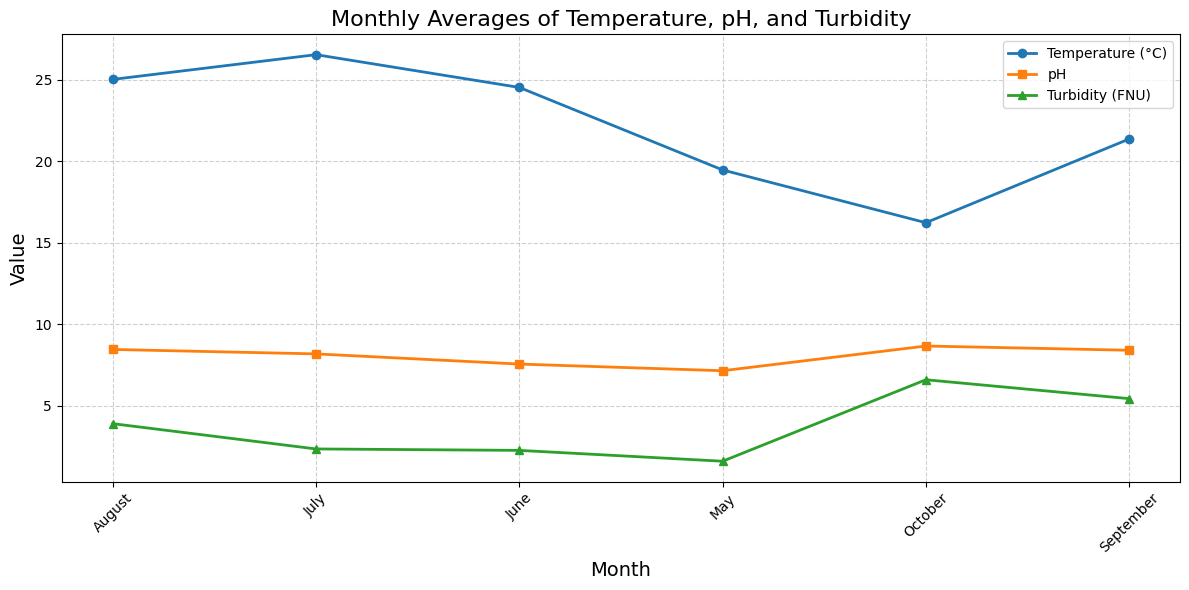

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot all three lines on the same graph
plt.plot(water_quality_monthly_averages_df['month'], water_quality_monthly_averages_df['temperature_c'], marker='o', label='Temperature (°C)', linewidth=2)
plt.plot(water_quality_monthly_averages_df['month'], water_quality_monthly_averages_df['pH'], marker='s', label='pH', linewidth=2)
plt.plot(water_quality_monthly_averages_df['month'], water_quality_monthly_averages_df['turbidity_fnu'], marker='^', label='Turbidity (FNU)', linewidth=2)

# Styling
plt.title('Monthly Averages of Temperature, pH, and Turbidity', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### **Scatter plot of temperature vs. dissolved oxygen**

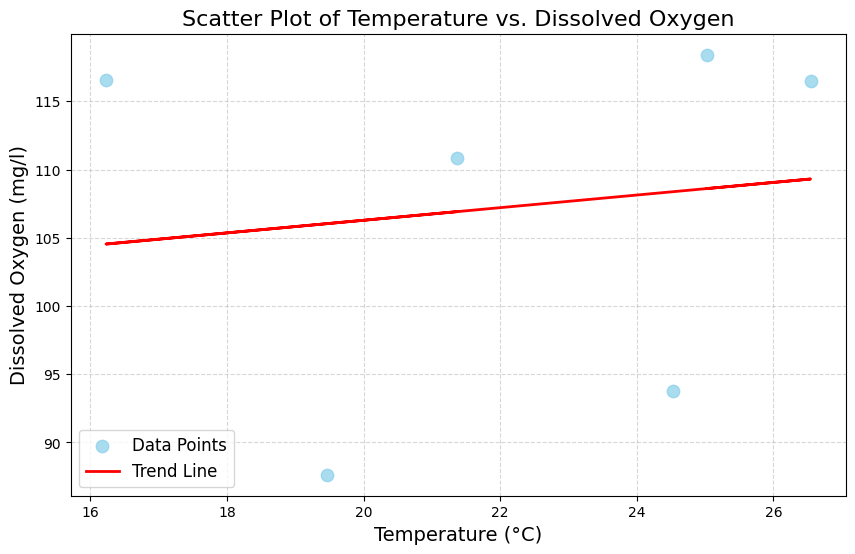

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


plt.figure(figsize=(10, 6))
plt.scatter(water_quality_monthly_averages_df['temperature_c'], water_quality_monthly_averages_df['dissolved_oxygen_percentage'], color='skyblue', s=80, alpha=0.7, label='Data Points')
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Scatter Plot of Temperature vs. Dissolved Oxygen', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Dissolved Oxygen (mg/l)', fontsize=14)

slope, intercept, r_value, p_value, std_err = linregress(water_quality_monthly_averages_df['temperature_c'], water_quality_monthly_averages_df['dissolved_oxygen_percentage'])
plt.plot(water_quality_monthly_averages_df['temperature_c'], slope * water_quality_monthly_averages_df['temperature_c'] + intercept, color='red', linestyle='-', linewidth=2, label='Trend Line')

plt.legend(fontsize=12)
plt.show()

This plot visualizes the relationship between temperature and dissolved oxygen percentage, showing how the dissolved oxygen percentage changes with temperature. Additionally, the trend line provides insight into the direction and strength of the relationship between the two variables

### **Multiple linear regression to investigate if temperature affects dissolved oxygen percentages**

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Convert relevant columns to numeric types
water_quality_monthly_averages_df[['temperature_c', 'conductivity_ms_cm', 'pH', 'dissolved_oxygen_mg_l',
       'dissolved_oxygen_percentage', 'turbidity_fnu', 'chlorophyll_rfu',
       'phycocyanin_rfu']] = water_quality_monthly_averages_df[['temperature_c', 'conductivity_ms_cm', 'pH', 'dissolved_oxygen_mg_l',
       'dissolved_oxygen_percentage', 'turbidity_fnu', 'chlorophyll_rfu',
       'phycocyanin_rfu']].apply(pd.to_numeric, errors='coerce')

# Fit a multiple linear regression model
model = smf.ols(formula='dissolved_oxygen_percentage ~ temperature_c + turbidity_fnu', data=water_quality_monthly_averages_df)

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     dissolved_oxygen_percentage   R-squared:                       0.754
Model:                                     OLS   Adj. R-squared:                  0.590
Method:                          Least Squares   F-statistic:                     4.600
Date:                         Fri, 28 Mar 2025   Prob (F-statistic):              0.122
Time:                                 03:46:21   Log-Likelihood:                -19.260
No. Observations:                            6   AIC:                             44.52
Df Residuals:                                3   BIC:                             43.90
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The code snippet fits a **multiple linear regression model** to analyze how **temperature** (`temperature_c`) and **turbidity** (`turbidity_fnu`) influence the **dissolved oxygen percentage** (`dissolved_oxygen_percentage`) using **monthly averaged data**. The output indicates that the model explains approximately **75.4%** of the variance in dissolved oxygen levels (**R-squared = 0.754**), which suggests a **reasonably good fit**. However, the **adjusted R-squared** drops to **0.590**, reflecting the **small number of observations (only 6)**, which limits the model's generalizability.

The **regression coefficients** show a **positive relationship** between both predictors and dissolved oxygen, with **temperature having a coefficient of 2.42** and **turbidity at 6.88**. This means that, according to the model, increases in **temperature** or **turbidity** are associated with **higher dissolved oxygen percentages**. However, these results should be interpreted with caution: the **p-values** for both predictors (**0.131** for temperature and **0.058** for turbidity) indicate that **neither is statistically significant** at the conventional **0.05 level**, although **turbidity is close**. Additionally, the overall model’s **F-statistic p-value is 0.122**, suggesting that the **model itself is not statistically significant**. Given the **small sample size**, the findings are **preliminary** and would benefit from a **larger dataset** to improve **reliability** and **statistical power**.


### **Data Visualization: Relationship Between Chlorophyll-a Concentration and Phycocyanin Concentration**

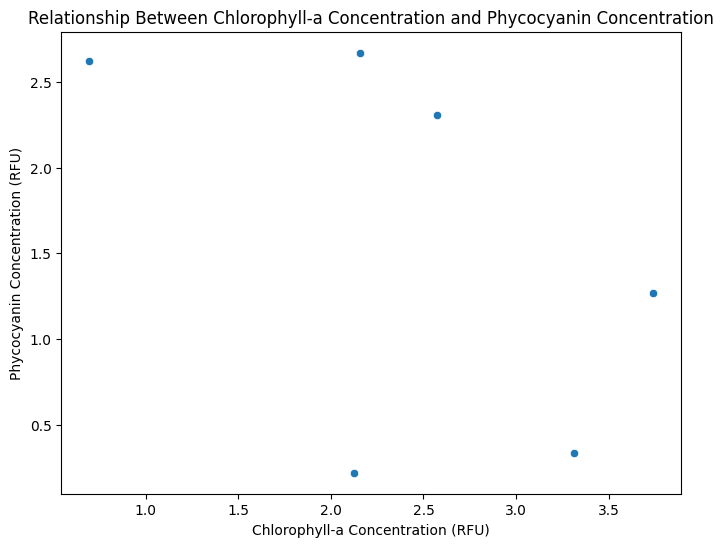

Pearson's Correlation Coefficient: -0.517


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as si

# Convert 'chlorophyll_rfu' and 'phycocyanin_rfu' columns to numeric, coercing invalid entries to NaN
# This ensures the data can be used for analysis and plotting
water_quality_monthly_averages_df[['chlorophyll_rfu', 'phycocyanin_rfu']] = \
    water_quality_monthly_averages_df[['chlorophyll_rfu', 'phycocyanin_rfu']].apply(pd.to_numeric, errors='coerce')

# Create a scatter plot to visualize the relationship between chlorophyll-a and phycocyanin concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chlorophyll_rfu', y='phycocyanin_rfu', data=water_quality_monthly_averages_df)
plt.title("Relationship Between Chlorophyll-a Concentration and Phycocyanin Concentration")
plt.xlabel("Chlorophyll-a Concentration (RFU)")
plt.ylabel("Phycocyanin Concentration (RFU)")
plt.show()

# Calculate Pearson’s correlation coefficient to measure the strength and direction of linear relationship
correlation, _ = si.pearsonr(
    water_quality_monthly_averages_df['chlorophyll_rfu'],
    water_quality_monthly_averages_df['phycocyanin_rfu']
)

# Print the correlation value, rounded to three decimal places
print(f"Pearson's Correlation Coefficient: {correlation:.3f}")


The code snippet visualizes and quantifies the relationship between **chlorophyll-a concentration** and **phycocyanin concentration** using a scatter plot and Pearson’s correlation coefficient. After ensuring both variables are numeric, a scatter plot is generated to explore potential patterns or associations between the two algal indicators. The plot shows individual data points for each year's average values. The Pearson correlation coefficient, calculated as **-0.517**, suggests a **moderate negative linear relationship**, meaning that as chlorophyll-a levels increase, phycocyanin levels tend to decrease—though not strongly or definitively. Given the small sample size, this insight is preliminary and should be interpreted with caution.

## **Random Forest Regressor model to predict dissolved oxygen level based on temperature, pH, and turbidity.**


Mean Absolute Error: 14.044116961728136
R^2 Score: -220.23178862432223


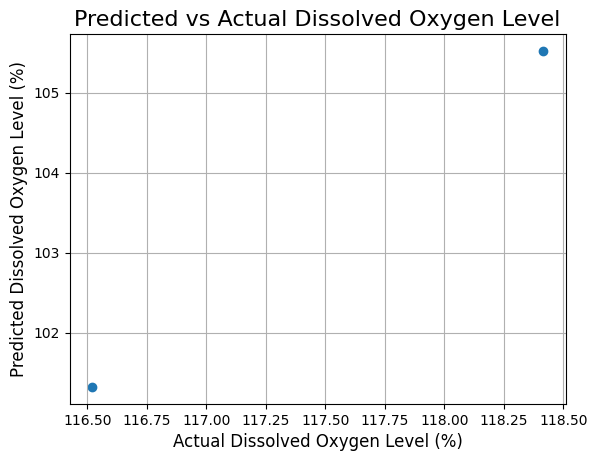

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Data Preprocessing
# -------------------------------

# Define input features (temperature, pH, turbidity)
X = water_quality_monthly_averages_df[['temperature_c', 'pH', 'turbidity_fnu']]

# Define target variable (dissolved oxygen percentage)
y = water_quality_monthly_averages_df['dissolved_oxygen_percentage']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------------
# Model Training
# -------------------------------

# Initialize a Random Forest Regressor with 100 decision trees
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
forest_regressor.fit(X_train, y_train)

# -------------------------------
# Prediction & Evaluation
# -------------------------------

# Make predictions on the test set
predictions = forest_regressor.predict(X_test)

# Calculate Mean Absolute Error and R² Score to evaluate model performance
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation results
print("\nMean Absolute Error:", mae)
print("R^2 Score:", r2)

# -------------------------------
# Visualization
# -------------------------------

# Plot predicted vs. actual dissolved oxygen percentages
plt.scatter(y_test, predictions)
plt.title("Predicted vs Actual Dissolved Oxygen Level", fontsize=16)
plt.xlabel("Actual Dissolved Oxygen Level (%)", fontsize=12)
plt.ylabel("Predicted Dissolved Oxygen Level (%)", fontsize=12)
plt.grid()
plt.show()


The code snippet implements a **Random Forest Regressor** to predict **dissolved oxygen percentage** based on three input features: **temperature**, **pH**, and **turbidity**, using yearly averaged water quality data. After splitting the data into training and testing sets, the model is trained and its performance is evaluated using **Mean Absolute Error (MAE)** and **R² Score**. The output shows a **MAE of 14.04**, indicating an average prediction error of about 14 percentage points. However, the **R² score is -220.23**, which is extremely poor and indicates that the model is performing **worse than simply predicting the mean** of the target variable. The scatter plot visually confirms this, showing that predicted values deviate significantly from actual values.

## **Causal effect of temperature on dissolved oxygen**  

Causal inference in observational data can be complex and typically requires controlling for confounders—variables that influence both the cause and the effect. One common method for estimating causal effects is using regression analysis while controlling for potential confounders.

If we hypothesize that temperature (temperature_c) affects dissolved oxygen levels (dissolved_oxygen_mg_l), while considering conductivity (conductivity_ms_cm), pH, and turbidity (turbidity_fnu) as potential confounders, we can use a multiple linear regression model to estimate the effect of temperature on dissolved oxygen levels while controlling for the potential confounding variables.

In this regression model, we would include temperature_c as the independent variable of interest (explanatory variable), and dissolved_oxygen_mg_l as the dependent variable (response variable). Additionally, we would include conductivity_ms_cm, pH, and turbidity_fnu as additional independent variables (potential confounders) in the model.

By including these potential confounders in the model, we aim to isolate the direct effect of temperature on dissolved oxygen levels while adjusting for any potential influence of conductivity, pH, and turbidity on the relationship.

The regression coefficients associated with temperature_c in the model would provide an estimate of the effect of temperature on dissolved oxygen levels after accounting for the potential confounding variables.

The linear regression model would be formulated as follows:

\[ \text{dissolved\_oxygen\_mg\_l} = \β_0 + \β_1 \times \text{temperature\_c} + \β_2 \times \text{conductivity\_ms\_cm} + \β_3 \times \text{pH} + \β_4 \times \text{turbidity\_fnu} + \ε \]

Where:
- \(\β_0\) is the intercept term,
- \(\β_1\) is the coefficient associated with temperature_c,
- \(\β_2\), \(\β_3\), and \(\β_4\) are the coefficients associated with conductivity_ms_cm, pH, and turbidity_fnu respectively,
- \(\ε\) is the error term.

The coefficient \(\β_1\) would represent the estimated effect of temperature on dissolved oxygen levels while controlling for the potential confounders.

In [ ]:
import statsmodels.api as sm

# Define the dependent variable
y = water_quality_monthly_averages_df['dissolved_oxygen_mg_l']

# Define the independent variables, including the variable of interest and potential confounders
X = water_quality_monthly_averages_df[['temperature_c', 'conductivity_ms_cm', 'pH', 'turbidity_fnu']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model to see the coefficients
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     dissolved_oxygen_mg_l   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  0.999
Method:                    Least Squares   F-statistic:                     1439.
Date:                   Fri, 28 Mar 2025   Prob (F-statistic):             0.0198
Time:                           03:47:38   Log-Likelihood:                 16.372
No. Observations:                      6   AIC:                            -22.74
Df Residuals:                          1   BIC:                            -23.79
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The code snippet performs a **multiple linear regression** using the `statsmodels` library to examine how **temperature**, **conductivity**, **pH**, and **turbidity** influence the **dissolved oxygen concentration in mg/L** (`dissolved_oxygen_mg_l`) across monthly averages. After adding a constant term to account for the intercept, the model is fit using Ordinary Least Squares (OLS). The regression output shows an **R-squared of 1.000**, indicating a perfect fit, but this is likely due to the **very small sample size (n = 6)**, which can lead to overfitting. Among the predictors, **temperature (p = 0.029)** and **pH (p = 0.022)** are statistically significant at the 0.05 level, suggesting they have meaningful effects on dissolved oxygen levels. Temperature has a **negative coefficient (-0.2575)**, meaning higher temperatures are associated with lower oxygen levels, while pH has a **positive coefficient (3.3417)**. However, due to the limited data, the model's stability and generalizability are questionable and should be interpreted with caution.

## **Causal Model of Water Quality Features**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from causalnex.structure import StructureModel

### Step 1: Calculate Correlation

In [ ]:
correlation_matrix = water_quality_monthly_averages_df.select_dtypes(include='number').corr()

Computes the correlation between all pairs of numerical features in the DataFrame water_quality_yearly_averages_df and stores the results in the correlation_matrix variable for further analysis or visualization.


### Step 2: Select Features

In [ ]:
# Get the absolute correlation values with each other
correlation_with_features = correlation_matrix.abs()

# Select the top features highly correlated with each other (excluding identical features)
threshold = 0.8  # Set your correlation threshold here
highly_correlated_features = (correlation_with_features > threshold) & (correlation_with_features < 1)
edges = [(f1, f2) for f1 in highly_correlated_features.columns for f2 in highly_correlated_features.columns
         if highly_correlated_features.loc[f1, f2]]


Identifies pairs of features that are highly correlated with each other (above the specified threshold) and stores them as edges in the edges list, which can be used to construct a causal structural model

In [ ]:
# Create a StructureModel instance
causal_model = StructureModel()

# Add nodes for selected features
for feature in water_quality_monthly_averages_df.columns:
    causal_model.add_node(feature)

# Add learned edges to the causal model
causal_model.add_edges_from(edges)

Constructs a causal structural model based on the selected features and the learned correlations between them

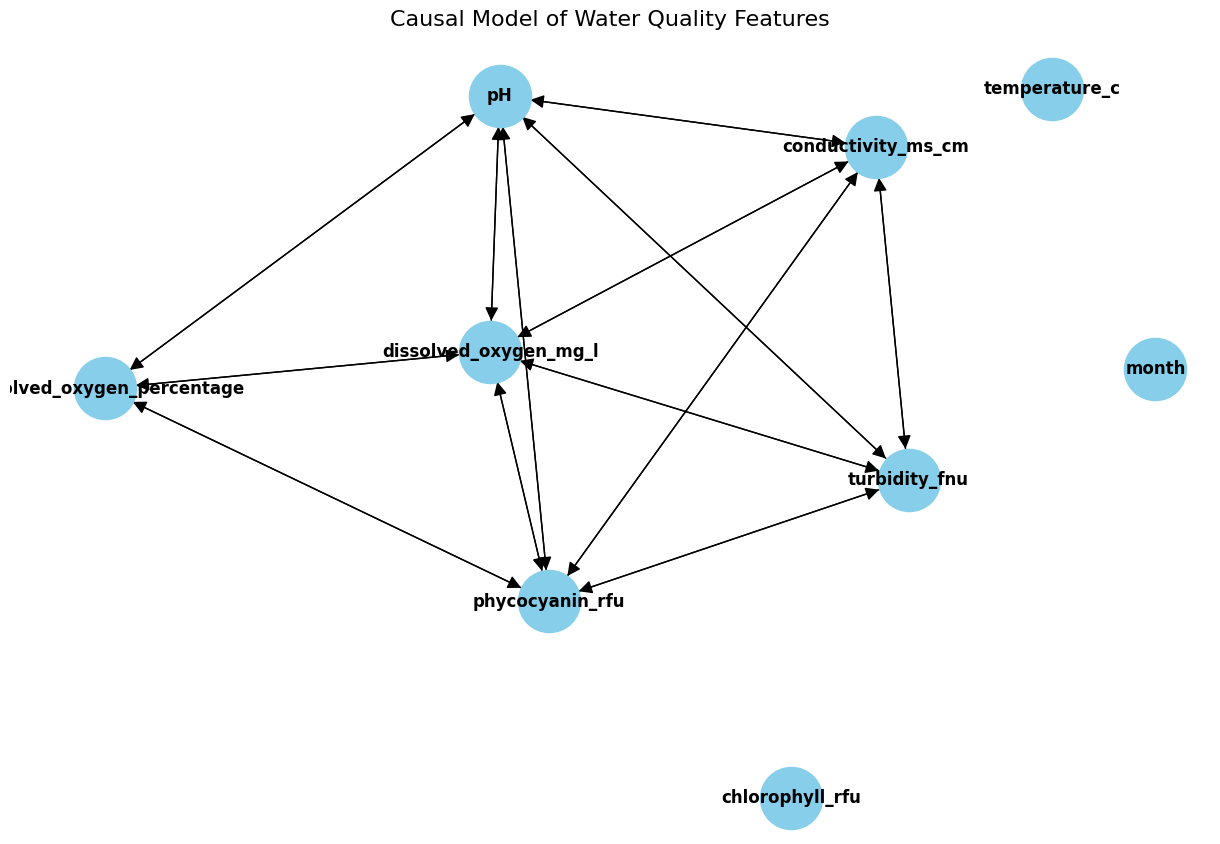

In [ ]:
# Visualize the causal model as a directed graph
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(causal_model)  # Using Kamada-Kawai layout for better node positioning
nx.draw(causal_model, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title('Causal Model of Water Quality Features', fontsize=16)
plt.show()

## **Observation**

The causal graph visualization reveals the **interconnected structure** of various water quality features. Most notably, **`dissolved_oxygen_mg_l` sits at the center of the network**, receiving directed edges from multiple nodes including `pH`, `turbidity_fnu`, and `conductivity_ms_cm`, suggesting it is **influenced by several upstream variables**. **`phycocyanin_rfu`** also acts as a **dependent variable**, with arrows pointing toward it from `pH` and `turbidity_fnu`. Interestingly, **`temperature_c` and `month` appear as isolated nodes**, not connected to any other variables in the graph. This may indicate that, within the current dataset and structure learning method, these features **do not exhibit strong causal relationships** with others or were filtered out due to weak statistical associations. Most edges point into **`dissolved_oxygen_mg_l` and `dissolved_oxygen_percentage`**, reflecting their role as **potential outcomes** in the system.


# **Conclusion**

The graph suggests that **dissolved oxygen concentration** (in mg/L and %) is **likely affected by pH, conductivity, and turbidity**, which aligns with known environmental science. This supports the idea that **oxygen levels are driven by multiple underlying processes** that affect aquatic ecosystems. The **absence of connections to `temperature_c` and `month`**, while surprising, may reflect **limitations in the dataset** (e.g., small size, monthly aggregation) or in the **causal discovery method** rather than a true lack of influence. Overall, this model offers a **useful starting point for hypothesis generation and feature prioritization** in predictive or interventional modeling of water quality dynamics. **Further validation** using domain expertise, time-series data, or interventional studies would **strengthen the reliability of these causal claims**.


# **References**

- https://medium.com/@EpiEllie/what-is-a-cause-da8c5522ccde  
- https://github.com/uber/causalml  
- https://www.bradyneal.com/causal-inference-course  
- https://matheusfacure.github.io/python-causality-handbook/landing-page.html  
- https://medium.com/@whystudying/causal-inference-with-python-causal-graphs-ef2f3a52c266  
- https://www.nature.com/articles/ijo200882  
- https://ajph.aphapublications.org/doi/10.2105/AJPH.2004.059204  
- https://www.cdc.gov/healthywater/surveillance/2021-waterborne-outbreaks-annual-report.html  
- https://statmodeling.stat.columbia.edu/  
- https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/  
- https://blogs.kent.ac.uk/jonw/files/2015/03/Rothman-Greenland-05-Causation-and-Causal-Inference-in-Epidemiology.pdf  
- https://towardsdatascience.com/a-complete-guide-to-causal-inference-8d5aaca68a47  
- https://www.plainconcepts.com/causal-ml/  
- https://li-ge.org/blog/causal-inference-tutorials/01-causal/  
- https://www.epa.gov/charlesriver/live-water-quality-data-lower-charles-river  


# **License**

MIT License

Copyright (c) 2025 Apoorv Dhaygude

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.